In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Cell 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

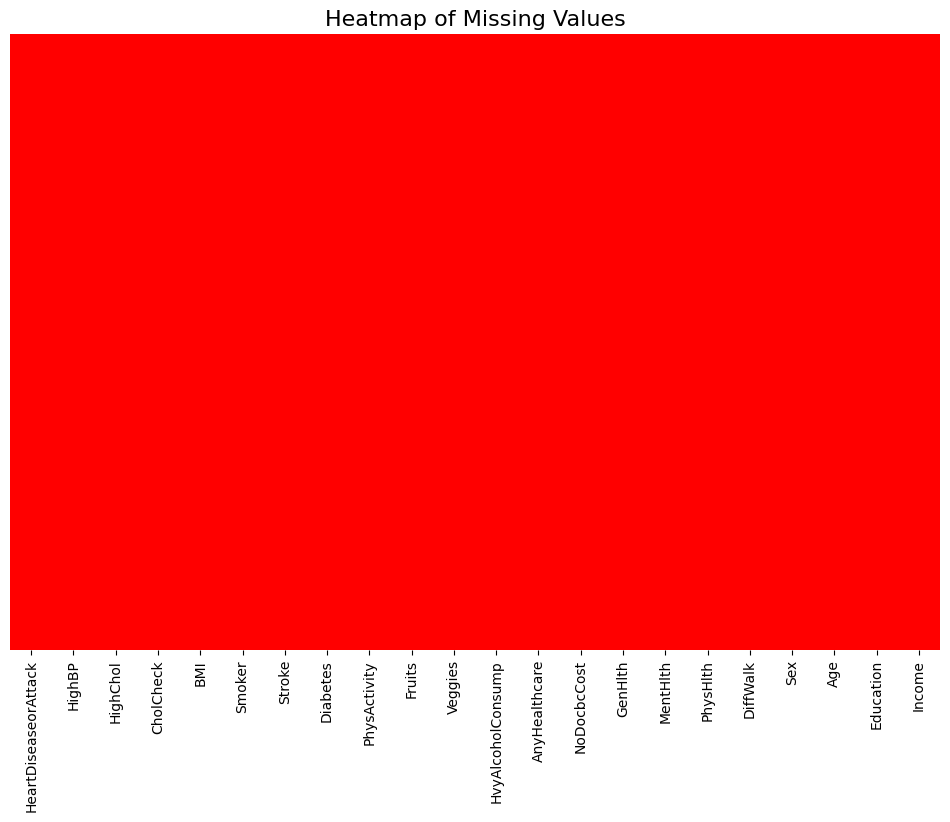

In [3]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Masters Project/heart_disease_health_indicators.csv')

# Display basic info and check for missing values
data.info()
print("\nMissing values per column:\n", data.isnull().sum())

# Creating a custom colormap: red for non-missing values, black for missing values
cmap = sns.color_palette(['red', 'blue'])

# Creating a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap=cmap, yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.show()


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


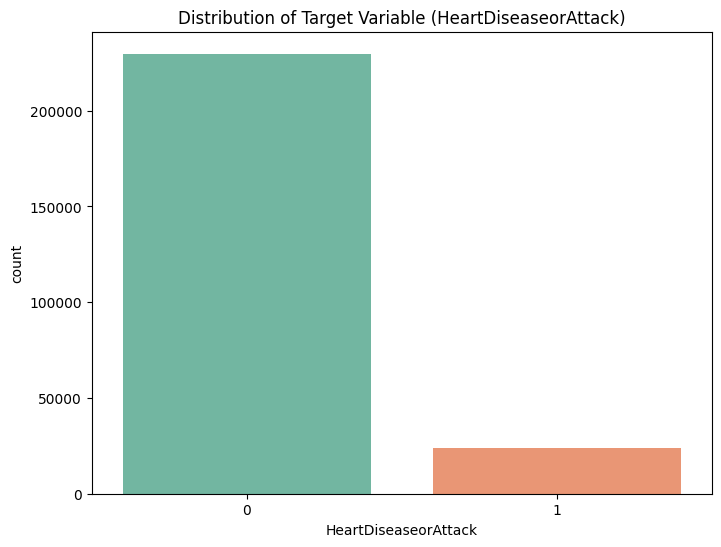

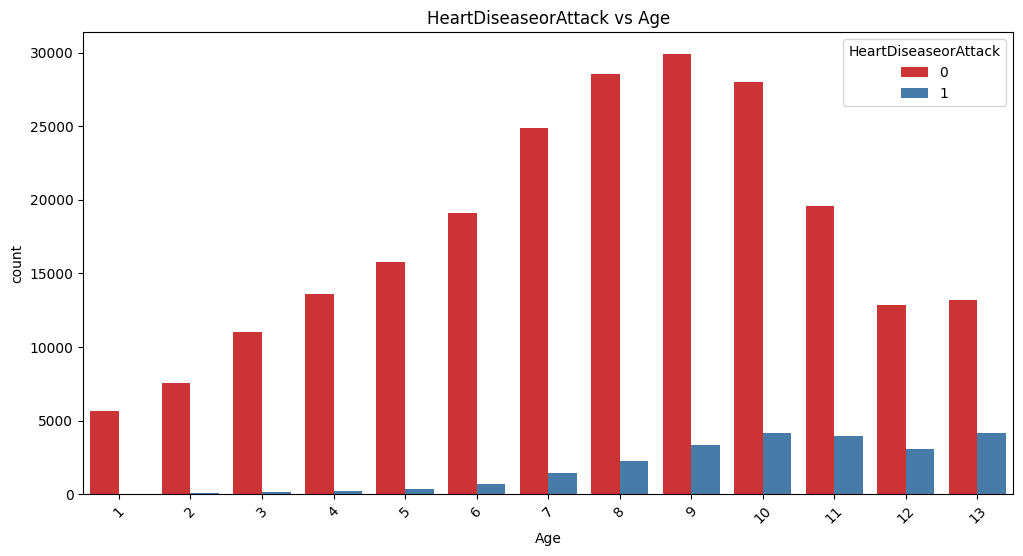

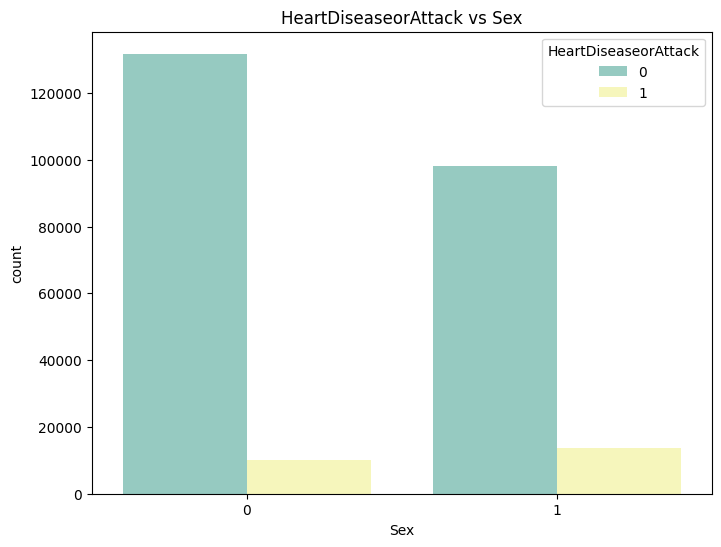

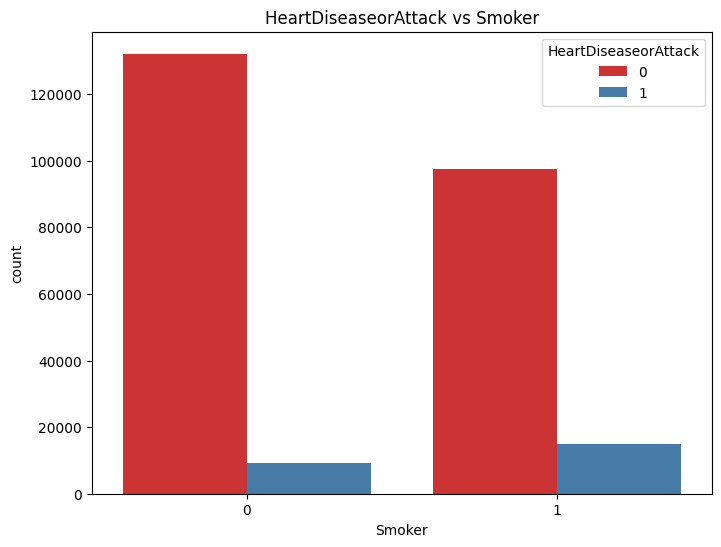

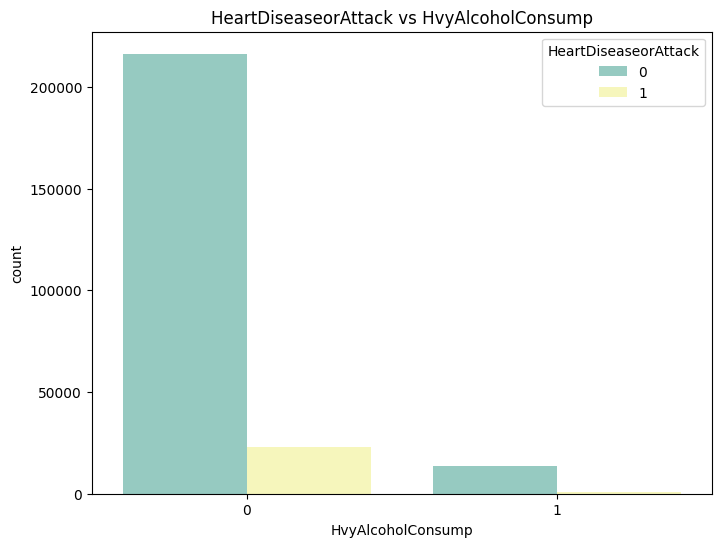

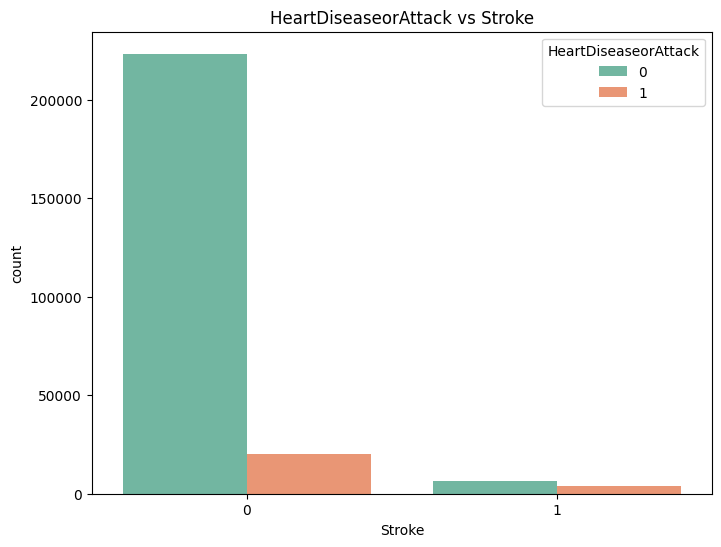

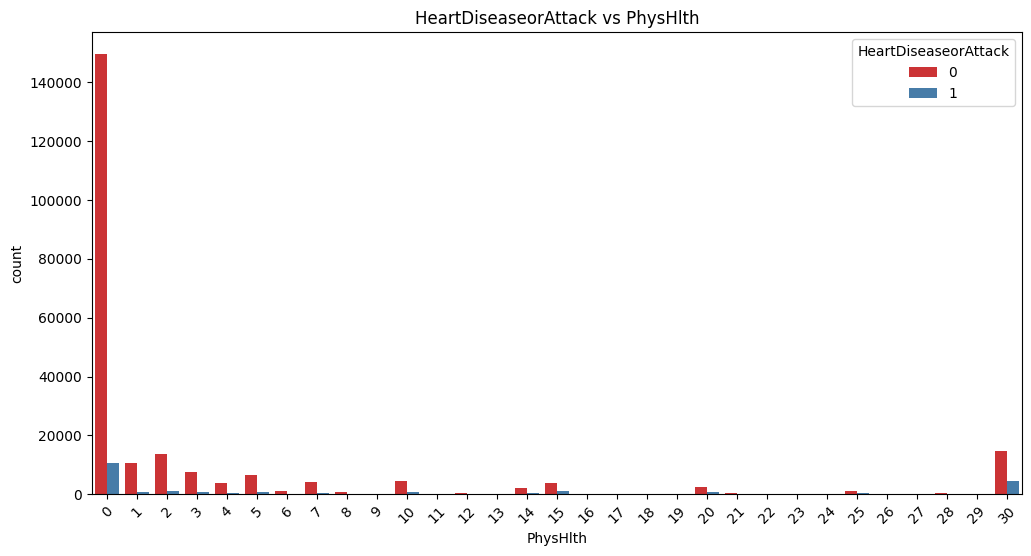

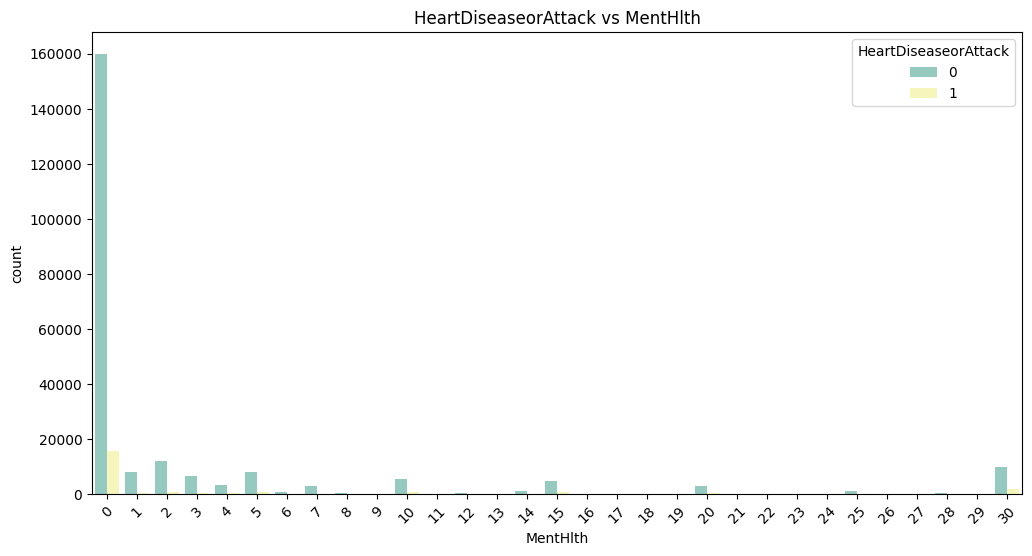

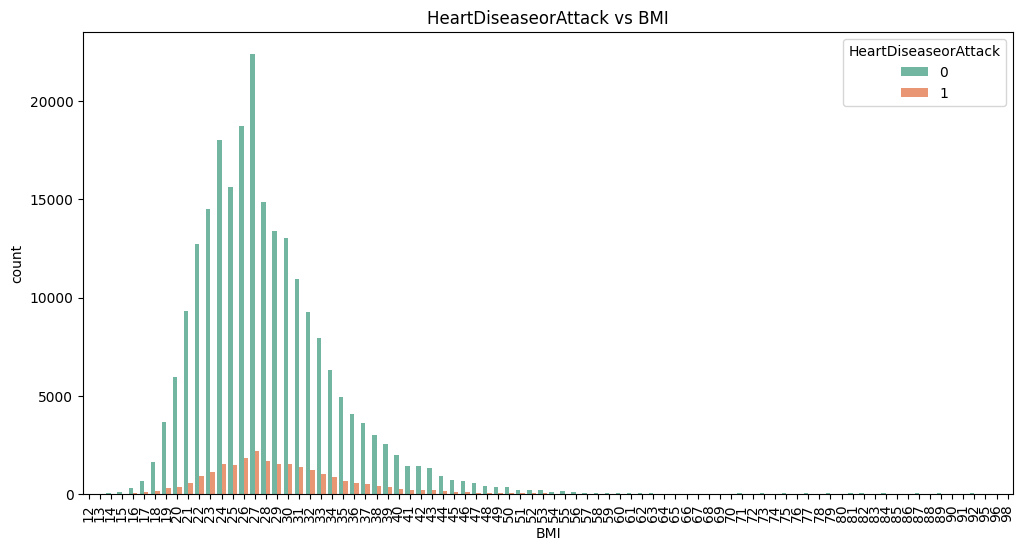

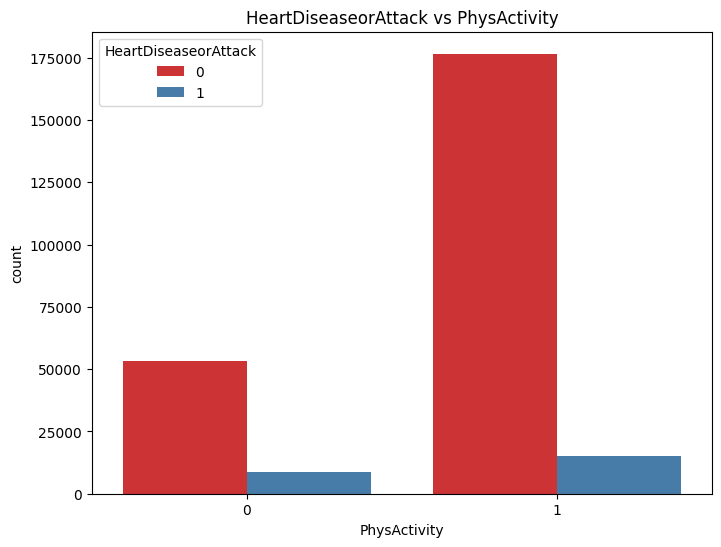

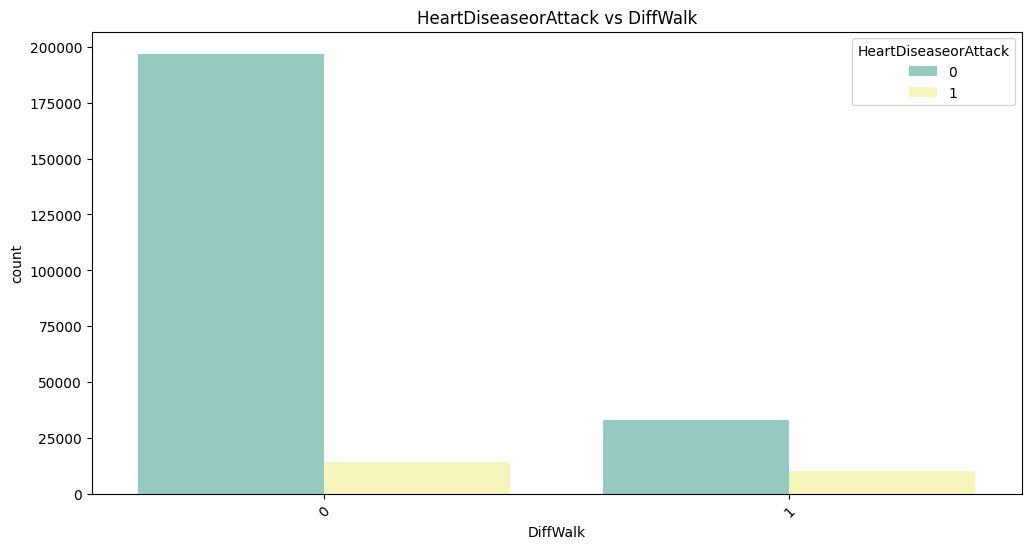

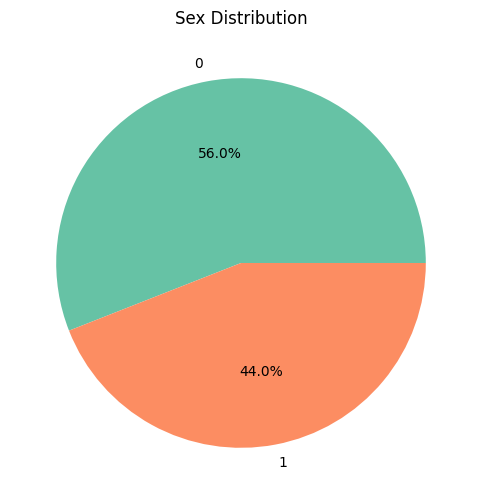

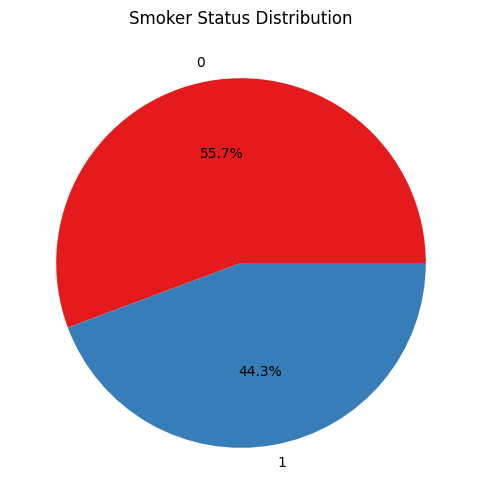

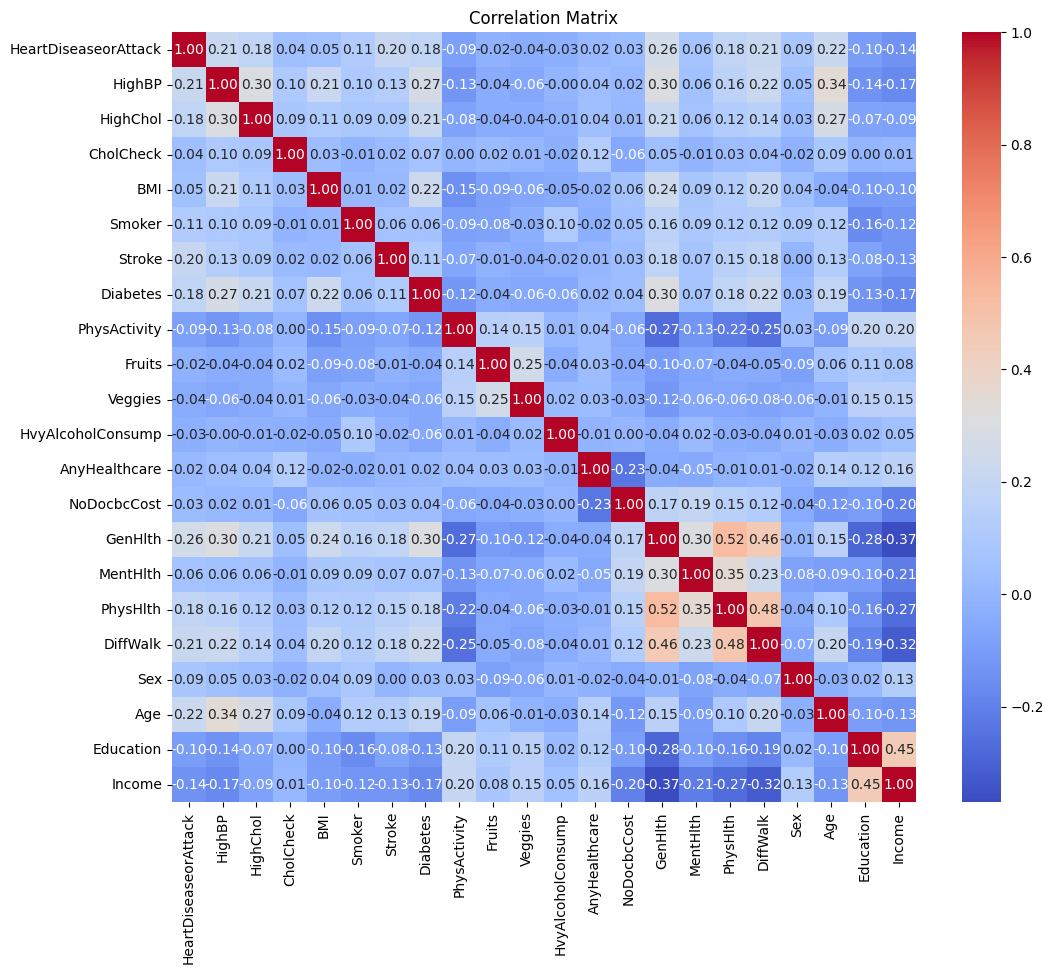

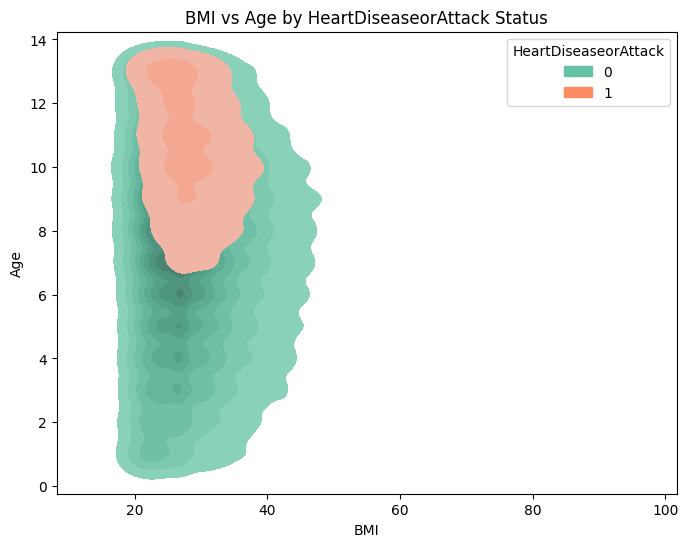

In [4]:
# Displaying the column names to verify
print(data.columns)

# Distribution of target variable (HeartDiseaseorAttack)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDiseaseorAttack', data=data, palette='Set2')
plt.title('Distribution of Target Variable (HeartDiseaseorAttack)')
plt.show()

# Barplot: HeartDiseaseorAttack vs Age
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='HeartDiseaseorAttack', data=data, palette='Set1')
plt.title('HeartDiseaseorAttack vs Age')
plt.xticks(rotation=45)
plt.show()

# Barplot: HeartDiseaseorAttack vs Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=data, palette='Set3')
plt.title('HeartDiseaseorAttack vs Sex')
plt.show()

# Barplot: HeartDiseaseorAttack vs Smoker
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=data, palette='Set1')
plt.title('HeartDiseaseorAttack vs Smoker')
plt.show()

# Barplot: HeartDiseaseorAttack vs HvyAlcoholConsump
plt.figure(figsize=(8, 6))
sns.countplot(x='HvyAlcoholConsump', hue='HeartDiseaseorAttack', data=data, palette='Set3')
plt.title('HeartDiseaseorAttack vs HvyAlcoholConsump')
plt.show()

# Barplot: HeartDiseaseorAttack vs Stroke
plt.figure(figsize=(8, 6))
sns.countplot(x='Stroke', hue='HeartDiseaseorAttack', data=data, palette='Set2')
plt.title('HeartDiseaseorAttack vs Stroke')
plt.show()

# Barplot: HeartDiseaseorAttack vs PhysHlth
plt.figure(figsize=(12, 6))
sns.countplot(x='PhysHlth', hue='HeartDiseaseorAttack', data=data, palette='Set1')
plt.title('HeartDiseaseorAttack vs PhysHlth')
plt.xticks(rotation=45)
plt.show()

# Barplot: HeartDiseaseorAttack vs MentHlth
plt.figure(figsize=(12, 6))
sns.countplot(x='MentHlth', hue='HeartDiseaseorAttack', data=data, palette='Set3')
plt.title('HeartDiseaseorAttack vs MentHlth')
plt.xticks(rotation=45)
plt.show()

# Barplot: HeartDiseaseorAttack vs BMI
plt.figure(figsize=(12, 6))
sns.countplot(x='BMI', hue='HeartDiseaseorAttack', data=data, palette='Set2')
plt.title('HeartDiseaseorAttack vs BMI')
plt.xticks(rotation=90)
plt.show()

# Barplot: HeartDiseaseorAttack vs PhysActivity
plt.figure(figsize=(8, 6))
sns.countplot(x='PhysActivity', hue='HeartDiseaseorAttack', data=data, palette='Set1')
plt.title('HeartDiseaseorAttack vs PhysActivity')
plt.show()

# Barplot: HeartDiseaseorAttack vs DiffWalk
plt.figure(figsize=(12, 6))
sns.countplot(x='DiffWalk', hue='HeartDiseaseorAttack', data=data, palette='Set3')
plt.title('HeartDiseaseorAttack vs DiffWalk')
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Sex Distribution
sex_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Sex Distribution')
plt.show()

# Pie Chart: Smoker Distribution
smoking_counts = data['Smoker'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Smoker Status Distribution')
plt.show()

# Correlation Matrix - Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# KDE plot: BMI vs Age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='BMI', y='Age', hue='HeartDiseaseorAttack', fill=True, palette='Set2')
plt.title('BMI vs Age by HeartDiseaseorAttack Status')
plt.show()


array([[<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cente

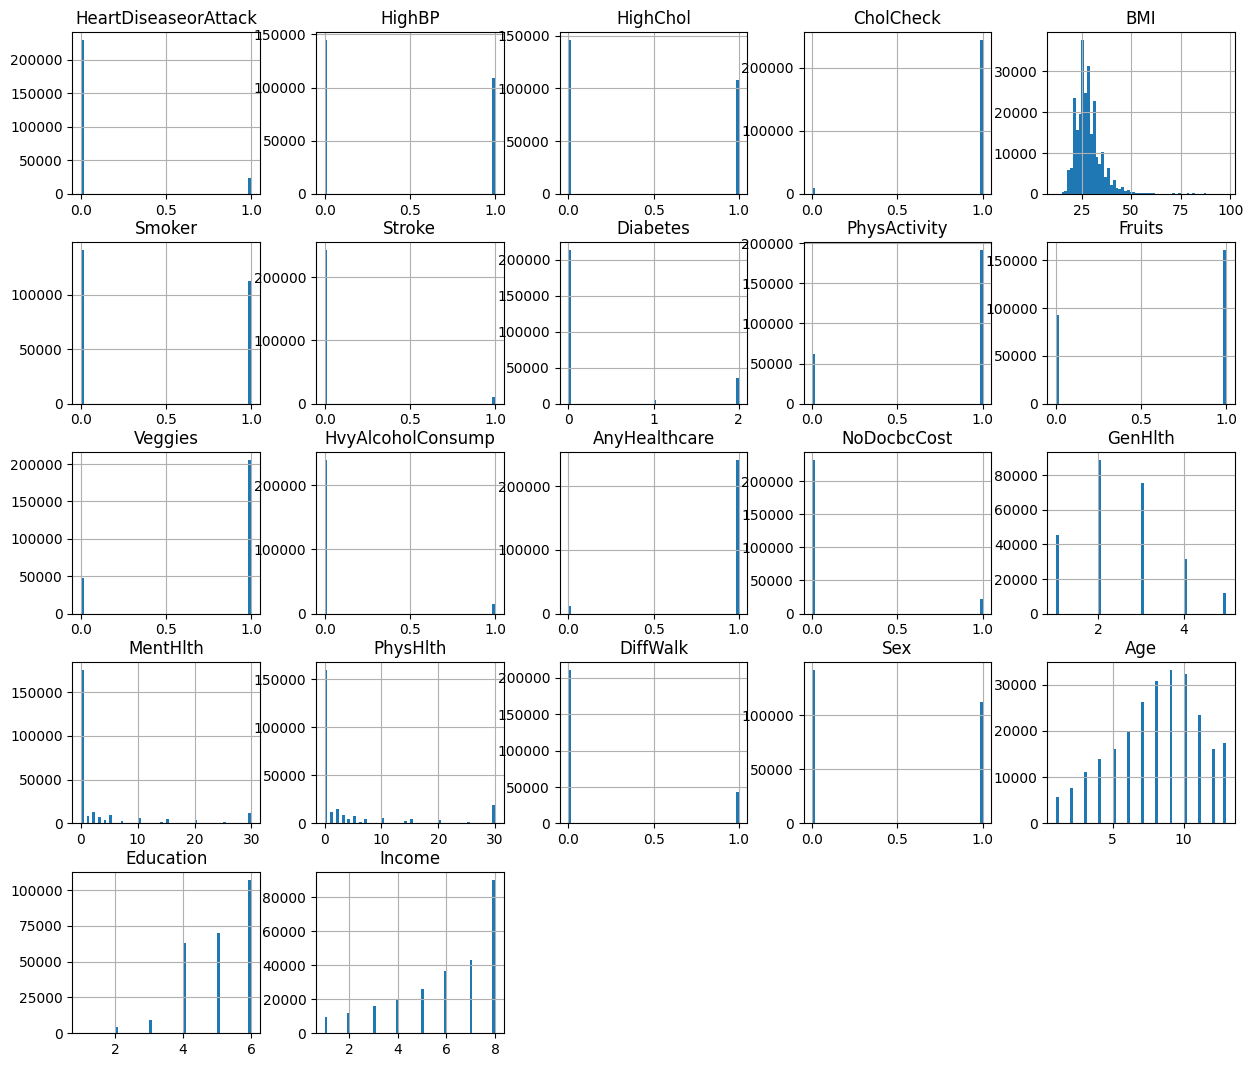

In [5]:
data.hist(bins=60, figsize=(15, 13))

In [6]:
# Cell 4: Data Preprocessing - Handling skewness
from scipy.stats import skew

numeric_feats = data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

# Standard scaling
scaler = StandardScaler()
data[numeric_feats] = scaler.fit_transform(data[numeric_feats])

# Verify skewness
data[numeric_feats].skew().sort_values(ascending=False)


,0
Stroke,4.657399
HvyAlcoholConsump,3.853959
NoDocbcCost,2.995603
HeartDiseaseorAttack,2.778996
Diabetes,1.937576
DiffWalk,1.773938
MentHlth,1.521941
PhysHlth,1.247862
BMI,0.720956
GenHlth,0.422903


array([[<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cente

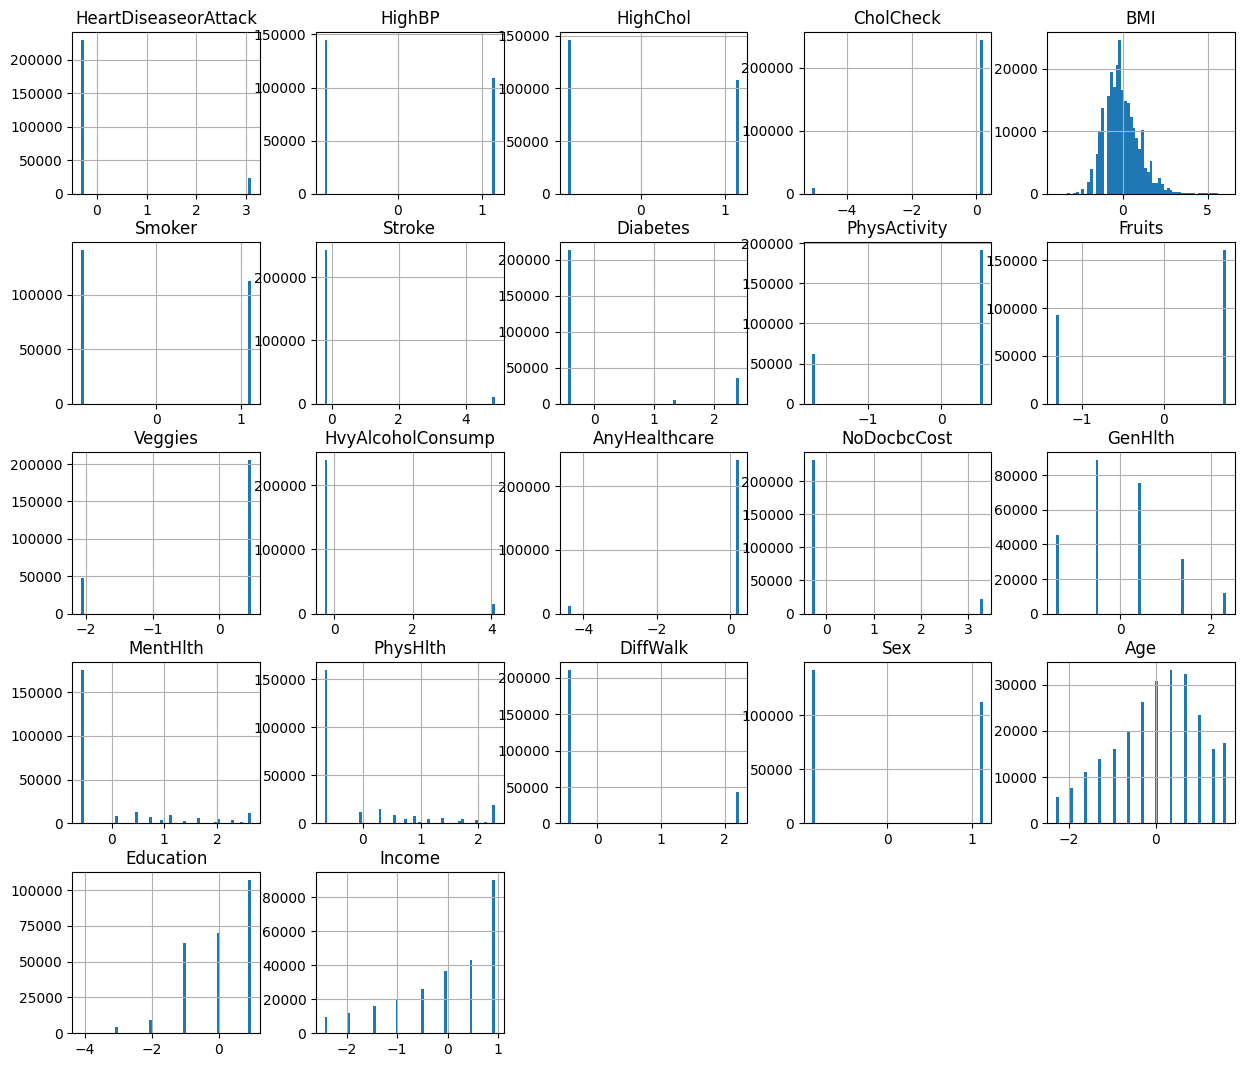

In [7]:
data.hist(bins=60, figsize=(15, 13))

In [8]:
# Ensuring the target variable is binary and converted to integers
data['HeartDiseaseorAttack'] = (data['HeartDiseaseorAttack'] > 0).astype(int)


In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Separate features and the binarized target
X = data.drop(columns=['HeartDiseaseorAttack'])
y_binarized = (data['HeartDiseaseorAttack'] > 0.5).astype(int)  # Example binarization

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binarized)

# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Defining ensemble models with class weights where applicable
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
     "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False) # Uncomment if XGBoost is available
}

# Training and evaluate ensemble models
ensemble_results = {}
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ensemble_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "Recall": recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        "Classification Report": classification_report(y_test, y_pred, zero_division=0)
    }

# Displaying results for ensemble models
ensemble_results_df = pd.DataFrame(ensemble_results).transpose()
print(ensemble_results_df)

# Converting results to a DataFrame and display
ensemble_results_df = pd.DataFrame(ensemble_results)
print(ensemble_results_df)


                   Accuracy Precision    Recall  F1 Score  \
Random Forest      0.947354  0.959093    0.9344  0.946585   
Gradient Boosting  0.906067   0.91359  0.896652  0.905042   
AdaBoost           0.862676  0.855532  0.872214  0.863793   
XGBoost            0.944025  0.985725  0.900924  0.941418   

                                               Classification Report  
Random Forest                    precision    recall  f1-score   ...  
Gradient Boosting                precision    recall  f1-score   ...  
AdaBoost                         precision    recall  f1-score   ...  
XGBoost                          precision    recall  f1-score   ...  
                                                           Random Forest  \
Accuracy                                                        0.947354   
Precision                                                       0.959093   
Recall                                                            0.9344   
F1 Score                           

In [11]:
from sklearn.model_selection import train_test_split

# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Defining a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Training and evaluate each model
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = model.predict(X_test)

    # Evaluating and printing results
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)


Logistic Regression Accuracy: 0.7776
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     69038
           1       0.76      0.80      0.78     68826

    accuracy                           0.78    137864
   macro avg       0.78      0.78      0.78    137864
weighted avg       0.78      0.78      0.78    137864

Confusion Matrix:
 [[51812 17226]
 [13440 55386]]
------------------------------------------------------------
Decision Tree Accuracy: 0.9112
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     69038
           1       0.90      0.92      0.91     68826

    accuracy                           0.91    137864
   macro avg       0.91      0.91      0.91    137864
weighted avg       0.91      0.91      0.91    137864

Confusion Matrix:
 [[62387  6651]
 [ 5593 63233]]
------------------------------------------------------------
Random Forest Accuracy: 0.9470
              precision  

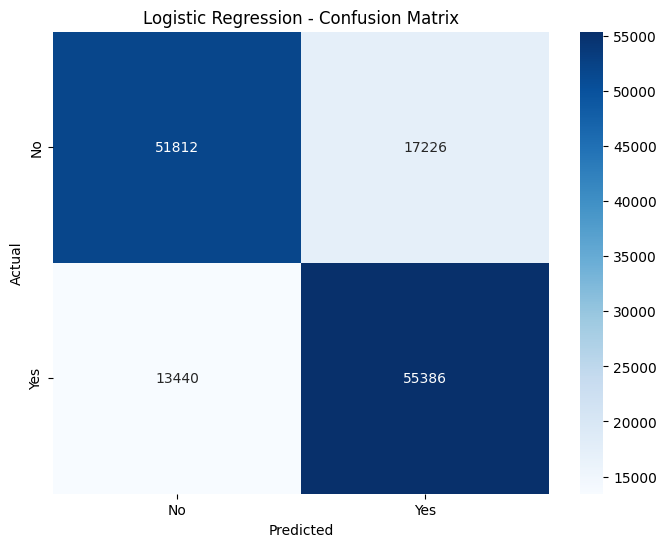

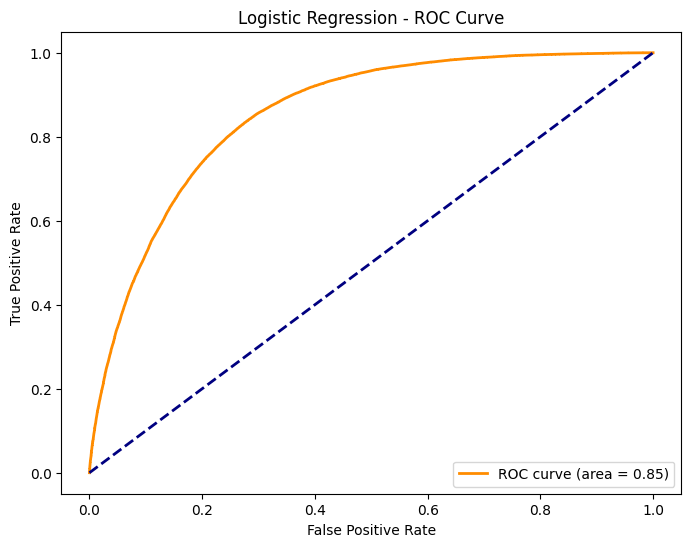

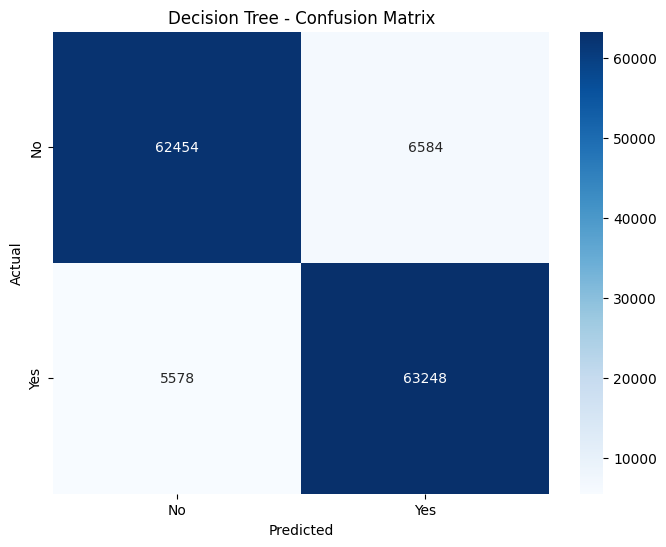

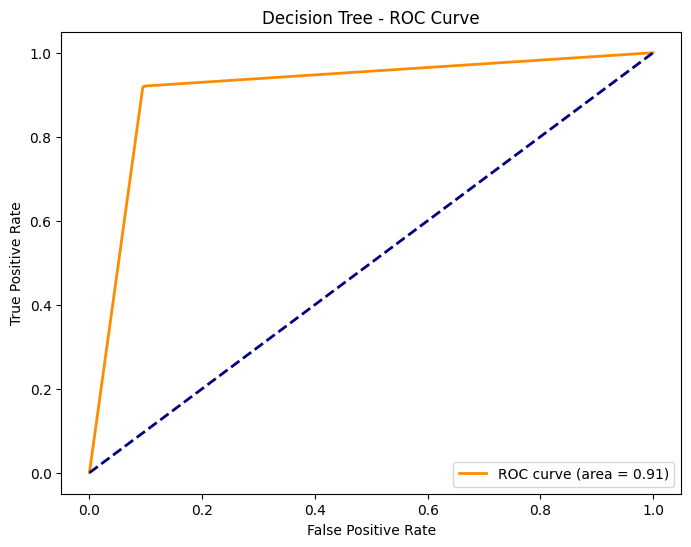

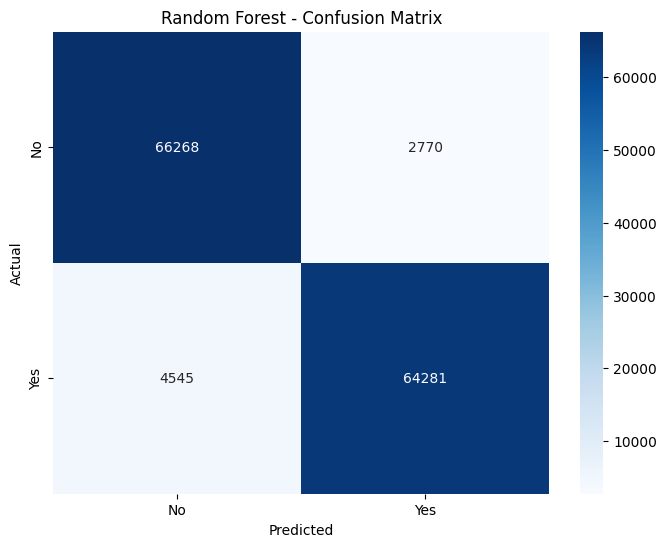

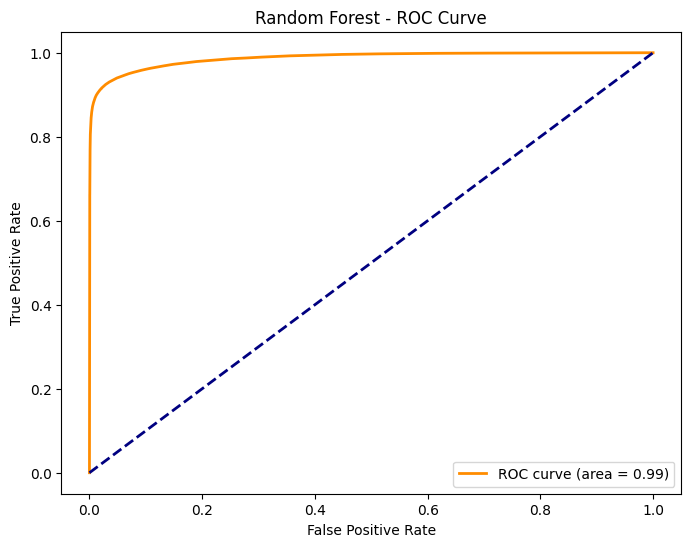

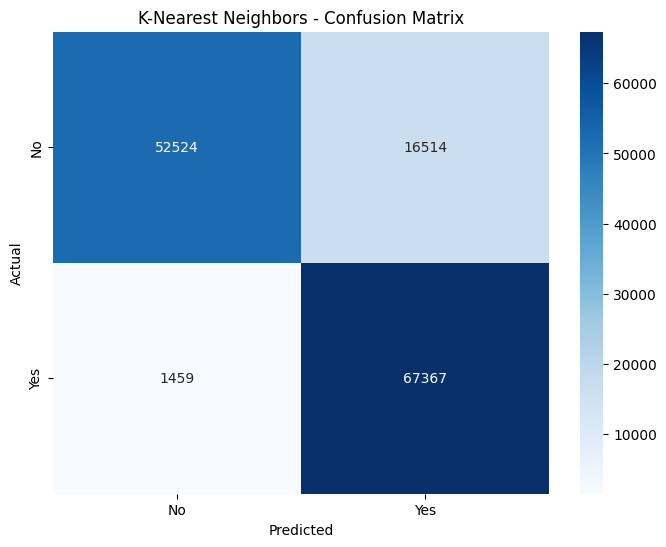

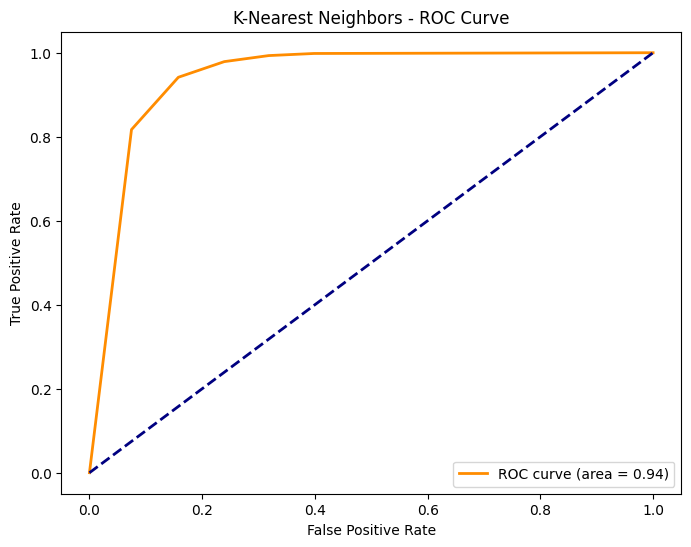

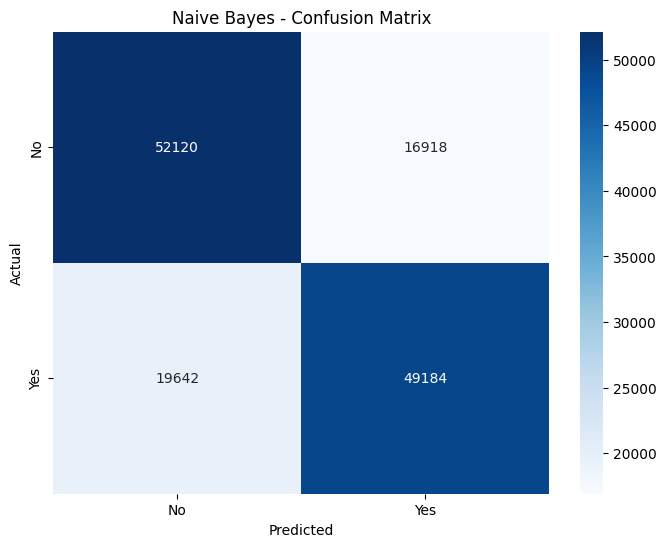

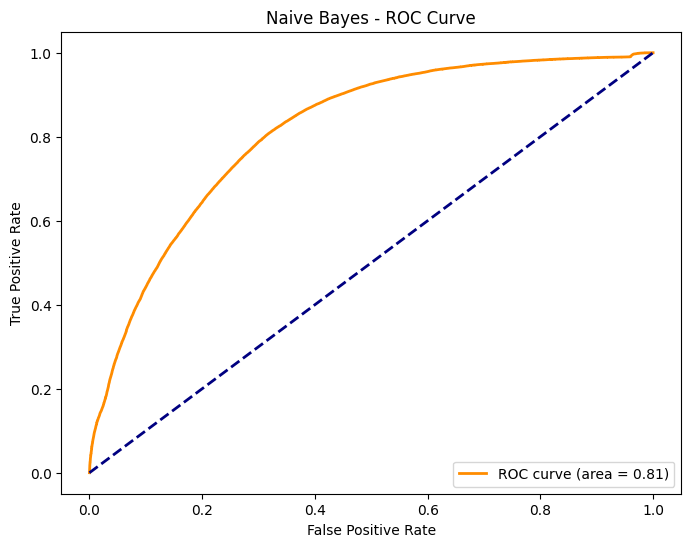

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.777563   0.762766  0.804725  0.783184  0.853885
1        Decision Tree  0.911783   0.905717  0.918955  0.912288  0.912764
2        Random Forest  0.946940   0.958688  0.933964  0.946165  0.986798
3  K-Nearest Neighbors  0.869632   0.803126  0.978802  0.882304  0.940609
4          Naive Bayes  0.734811   0.744062  0.714614  0.729041  0.813730


In [12]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Defining a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Initializing a list to hold the results
results = []

# Training and evaluate each model
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = model.predict(X_test)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    # Calculating ROC AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM that do not have predict_proba
        y_prob = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)

    # Appending results to the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Converting results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


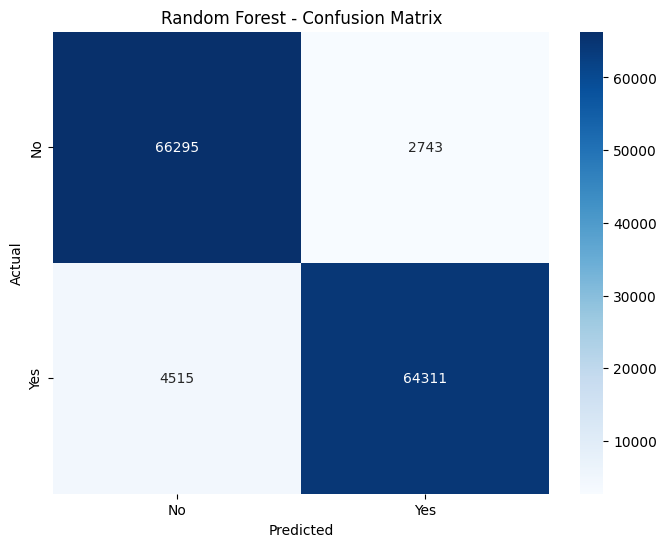

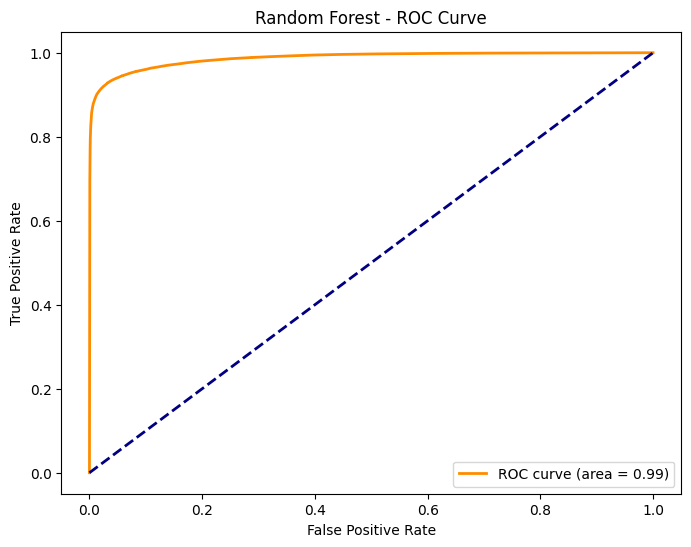

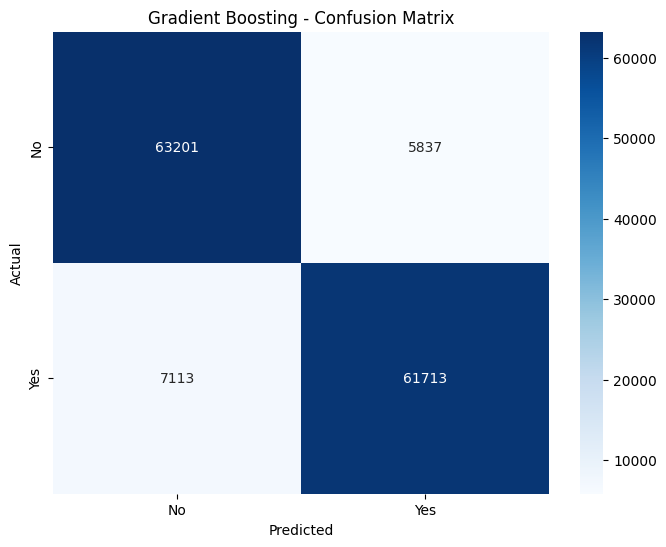

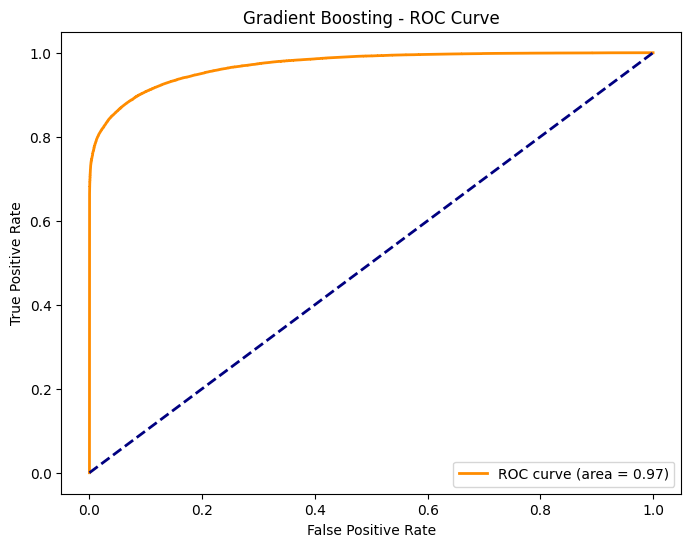

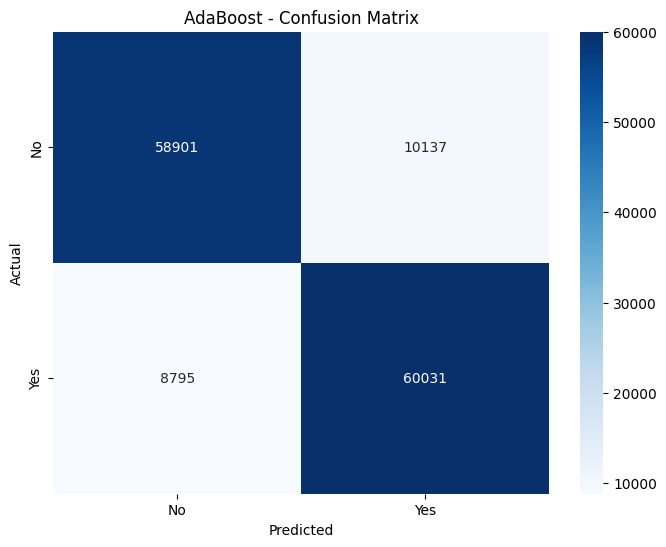

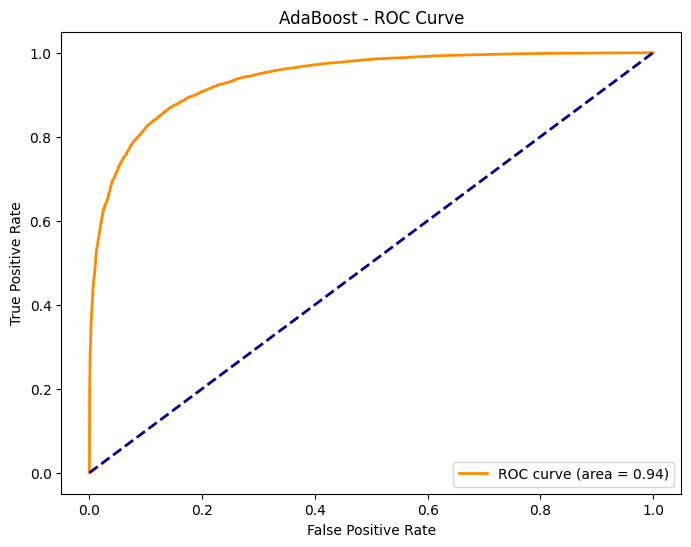

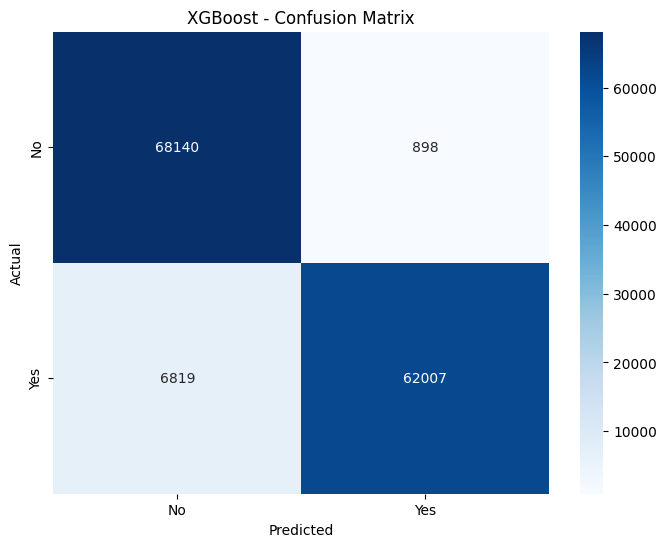

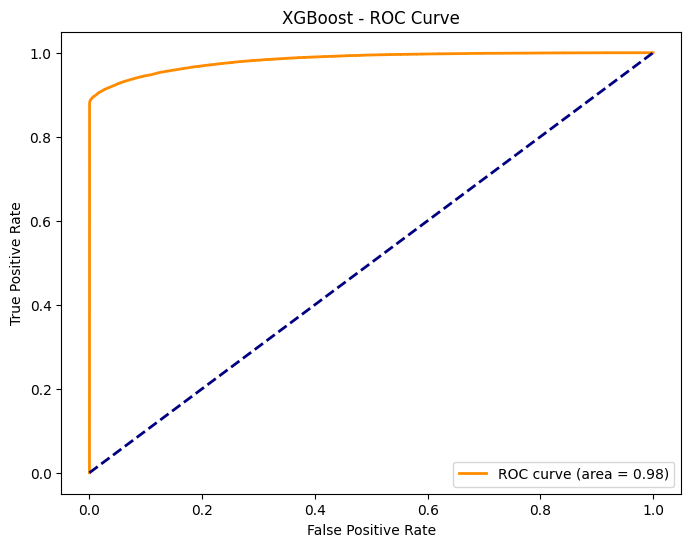

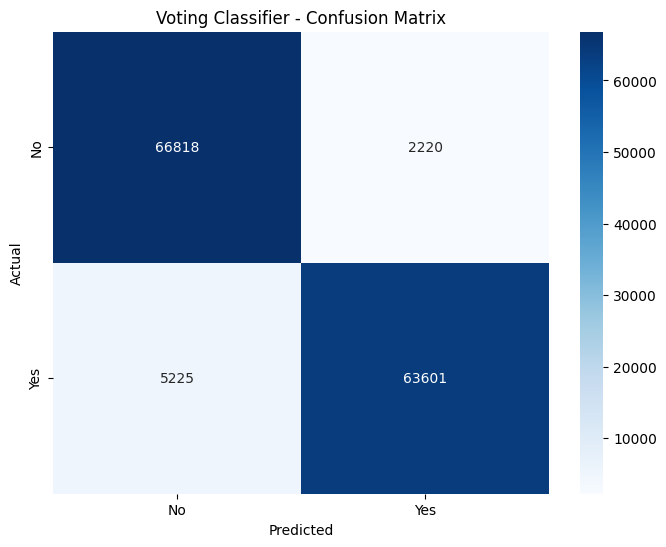

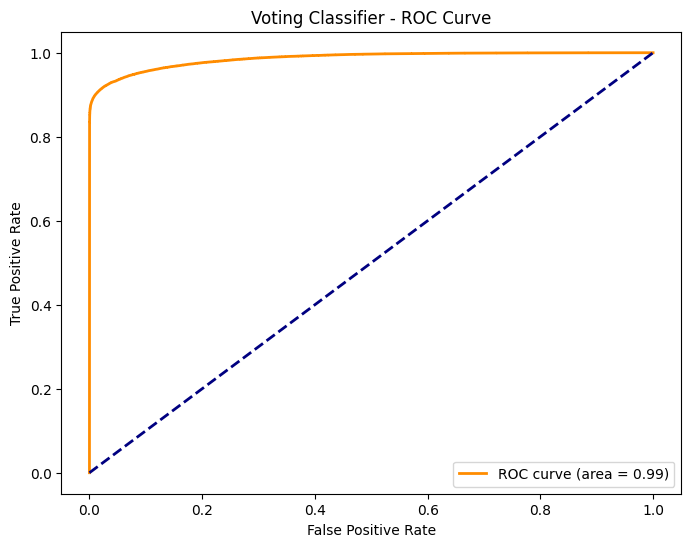

               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Random Forest  0.947354   0.959093  0.934400  0.946585  0.986771
1  Gradient Boosting  0.906067   0.913590  0.896652  0.905042  0.970558
2           AdaBoost  0.862676   0.855532  0.872214  0.863793  0.940007
3            XGBoost  0.944025   0.985725  0.900924  0.941418  0.982813
4  Voting Classifier  0.945998   0.966272  0.924084  0.944707  0.986067


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Separating features and the binarized target
X = data.drop(columns=['HeartDiseaseorAttack'])
y_binarized = (data['HeartDiseaseorAttack'] > 0.5).astype(int)  # Example binarization

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binarized)

# Spliting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Defining ensemble models with class weights where applicable
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)  # XGBoost model
}

# Defining Voting Classifier using the ensemble models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', ensemble_models["Random Forest"]),
        ('gb', ensemble_models["Gradient Boosting"]),
        ('ada', ensemble_models["AdaBoost"]),
        ('xgb', ensemble_models["XGBoost"]),
    ],
    voting='soft'
)

# Adding the Voting Classifier to the models dictionary
ensemble_models["Voting Classifier"] = voting_clf

# Training and evaluate ensemble models
results = []

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)

    # Calculating ROC AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_prob)

    # Storing results in a list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


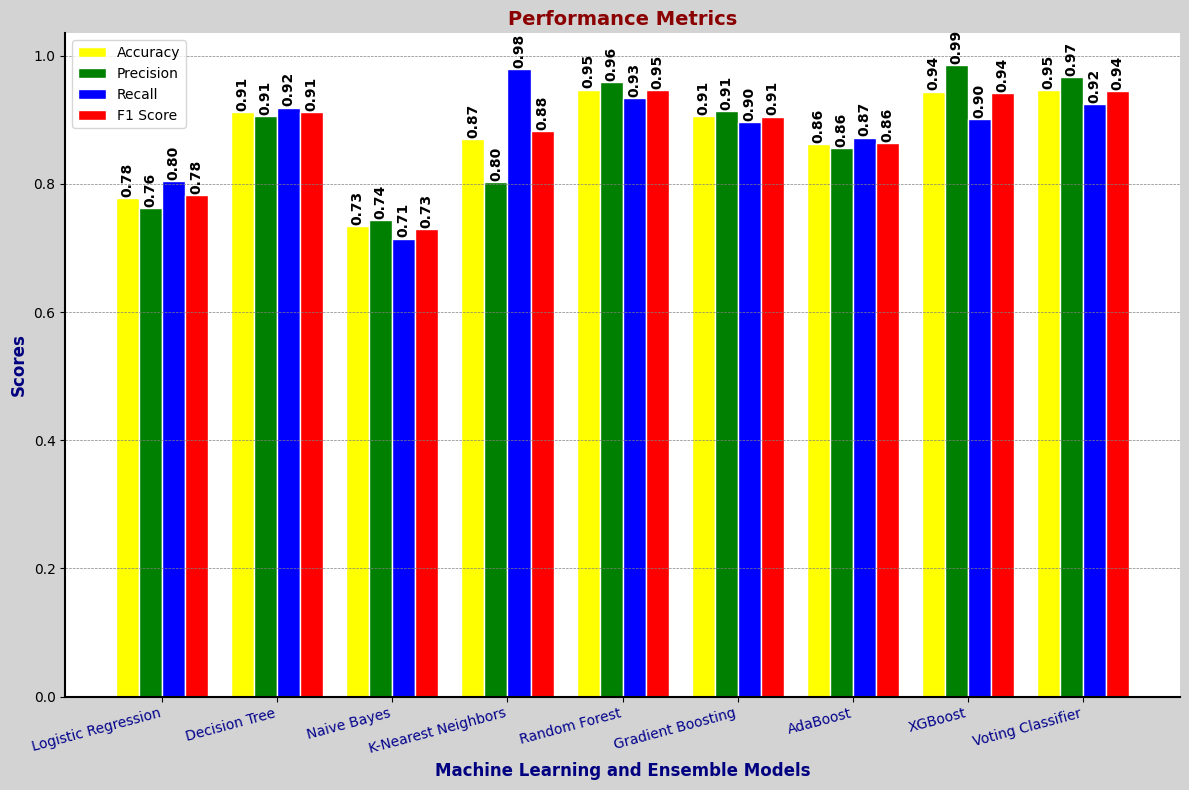

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your table
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors',
          'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'Voting Classifier']

accuracy = [0.777563, 0.911572, 0.734811, 0.869632, 0.947354, 0.906067, 0.862676, 0.944025, 0.945998]
precision = [0.762766, 0.905236, 0.744062, 0.803126, 0.959093, 0.913590, 0.855532, 0.985725, 0.966272]
recall = [0.804725, 0.919086, 0.714614, 0.978802, 0.934400, 0.896652, 0.872214, 0.900924, 0.924084]
f1_score = [0.783184, 0.912108, 0.729041, 0.882304, 0.946585, 0.905042, 0.863793, 0.941418, 0.944707]

# Number of bars
n = len(models)
ind = np.arange(n)  # the x locations for the groups
width = 0.2  # the width of the bars
colors = ['yellow', 'green', 'blue', 'red']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8), facecolor='lightgrey')

# Bars for each metric with specified colors
bar1 = ax.bar(ind - width*1.5, accuracy, width, label='Accuracy', color=colors[0], edgecolor='white')
bar2 = ax.bar(ind - width/2, precision, width, label='Precision', color=colors[1], edgecolor='white')
bar3 = ax.bar(ind + width/2, recall, width, label='Recall', color=colors[2], edgecolor='white')
bar4 = ax.bar(ind + width*1.5, f1_score, width, label='F1 Score', color=colors[3], edgecolor='white')

# Adding labels for bars with  rotation
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', color='black', weight='bold', rotation=90)

# Labels, title, and ticks
ax.set_xlabel('Machine Learning and Ensemble Models', fontsize=12, fontweight='bold', color='navy')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold', color='navy')
ax.set_title('Performance Metrics', fontsize=14, fontweight='bold', color='darkred')
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=15, ha="right", fontsize=10, color='darkblue')
ax.legend(facecolor='white', frameon=True)

# Improving grid and axis styles
ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()
